<a href="https://colab.research.google.com/github/franlopez1234/7506R-1C2023-GRUPO17/blob/Tp_1/Tp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Preparacion del Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_hotels_train = pd.read_csv('drive/MyDrive/hotels_train.csv')

Observamos los tipos de datos contienen nuestras columnas

In [4]:
#Eliminamos las columnas de reservation_status y reservation_status_date para evitar confusiones
#df_hotels_train = df_hotels_train.drop(['reservation_status','reservation_status_date'], axis =1) ->Desmarcar al abrir el archivo
df_hotels_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Como los datos del tipo object dificultan realizar graficos y usar algunas funciones de colab, vamos a definir un tipo de dato para cada uno

In [5]:
df_hotels_train['hotel'] = df_hotels_train['hotel'].astype('string')
df_hotels_train['arrival_date_month'] = df_hotels_train['arrival_date_month'].astype('string')
df_hotels_train['meal'] = df_hotels_train['meal'].astype('string')
df_hotels_train['country'] = df_hotels_train['country'].astype('string')
df_hotels_train['id'] = df_hotels_train['id'].astype('string')
df_hotels_train['customer_type'] = df_hotels_train['customer_type'].astype('string')
df_hotels_train['market_segment'] = df_hotels_train['market_segment'].astype('string')
df_hotels_train['distribution_channel'] = df_hotels_train['distribution_channel'].astype('string')
df_hotels_train['reserved_room_type'] = df_hotels_train['reserved_room_type'].astype('string')
df_hotels_train['assigned_room_type'] = df_hotels_train['assigned_room_type'].astype('string')
df_hotels_train['deposit_type'] = df_hotels_train['deposit_type'].astype('string')


##Mostramos las variables cuantitativas

In [44]:
lista_cuantitativas = ['adults','children', 'babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','total_of_special_requests',  'lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights', 'days_in_waiting_list']
df_cuantitativas = df_hotels_train[lista_cuantitativas].squeeze() #Primero separamos las cuantitvas
df_cuantitativas.head(5)

,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,total_of_special_requests,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,days_in_waiting_list
0,1,0.0,0,0,0,0,115.5,1,49,37,5,1,2,0
1,2,0.0,0,0,0,0,42.0,0,4,44,31,0,1,0
2,2,2.0,0,0,0,0,229.0,2,25,42,13,0,1,0
3,2,0.0,0,0,0,0,75.0,0,26,51,12,2,5,0
4,2,0.0,0,0,0,0,75.0,1,104,12,19,2,5,0


Mostramos media, moda y mediana

In [ ]:
df_cuantitativas.mean()

adults                              1.862791
children                            0.104896
babies                              0.007155
previous_cancellations              0.114790
previous_bookings_not_canceled      0.115420
booking_changes                     0.195952
adr                               102.383773
total_of_special_requests           0.523703
lead_time                         112.248187
arrival_date_week_number           27.218080
arrival_date_day_of_month          15.785812
stays_in_weekend_nights             0.924135
stays_in_week_nights                2.510054
days_in_waiting_list                2.638977
dtype: float64

In [ ]:
df_cuantitativas.mode().squeeze()

adults                             2.0
children                           0.0
babies                             0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
booking_changes                    0.0
adr                               62.0
total_of_special_requests          0.0
lead_time                          0.0
arrival_date_week_number          33.0
arrival_date_day_of_month         17.0
stays_in_weekend_nights            0.0
stays_in_week_nights               2.0
days_in_waiting_list               0.0
Name: 0, dtype: float64

In [ ]:
df_cuantitativas.median()

adults                             2.0
children                           0.0
babies                             0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
booking_changes                    0.0
adr                               95.0
total_of_special_requests          0.0
lead_time                         78.0
arrival_date_week_number          28.0
arrival_date_day_of_month         16.0
stays_in_weekend_nights            1.0
stays_in_week_nights               2.0
days_in_waiting_list               0.0
dtype: float64

##Mostramos las variables cualitativas

In [46]:
df_cualitativas = df_hotels_train.drop(lista_cuantitativas, axis=1).squeeze()
df_cualitativas.head(5)

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,required_car_parking_spaces,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,2016,September,BB,USA,Online TA,TA/TO,0,D,D,No Deposit,9.0,Transient,0,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,2015,October,BB,PRT,Groups,Direct,0,A,A,No Deposit,9.0,Transient,1,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,2016,October,BB,CHE,Online TA,TA/TO,0,F,F,No Deposit,9.0,Transient,0,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,2016,December,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,154.0,Transient,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,2017,March,BB,FRA,Offline TA/TO,TA/TO,0,A,A,No Deposit,20.0,Transient-Party,0,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,customer_type,required_car_parking_spaces,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,2016,September,BB,USA,Online TA,TA/TO,0,D,D,No Deposit,9.0,Transient,0,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,2015,October,BB,PRT,Groups,Direct,0,A,A,No Deposit,9.0,Transient,1,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,2016,October,BB,CHE,Online TA,TA/TO,0,F,F,No Deposit,9.0,Transient,0,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,2016,December,BB,PRT,Groups,TA/TO,0,A,A,Non Refund,154.0,Transient,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,2017,March,BB,FRA,Offline TA/TO,TA/TO,0,A,A,No Deposit,20.0,Transient-Party,0,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [ ]:
#Mostramos los posibles valores que toman las variables cualitativas y cada cuanto los toman
for c in df_cualitativas.columns:
    print("----"+c+"---")
    print(df_cualitativas[c].value_counts())
    print()

----hotel---
City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: Int64

----arrival_date_year---
2016    29362
2017    21066
2015    11485
Name: arrival_date_year, dtype: int64

----arrival_date_month---
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

----meal---
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

----country---
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

----market_segment---
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined   

##Analisis de correlacion y graficos de distribucion de las variables

*Distribucion de datos*

In [ ]:
#df_hotels_train.hist(figsize=(20,20), bins=27)

0

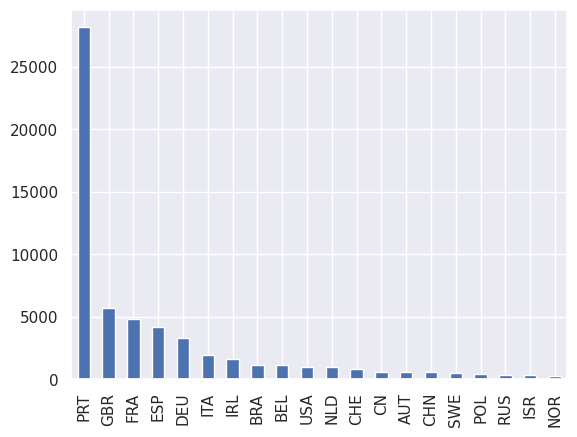

In [35]:
#Realizamos graficos para ver la distribucion de las varaibles

#Countrys
graf_de_paises = df_hotels_train['country'].value_counts().head(20)
graf_de_paises.plot(kind='bar')


<Axes: >

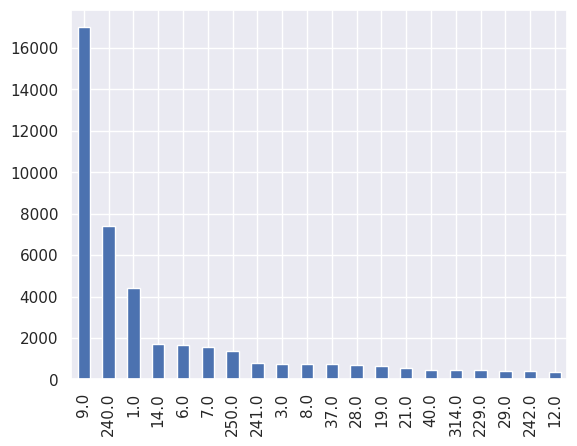

In [19]:
graf_de_agent = df_hotels_train['agent'].value_counts().head(20)
graf_de_agent.plot(kind='bar')

Analisis de la correlacion entre variables

In [ ]:
correlacion_todas = df_hotels_train.corr()
display(correlacion_todas)


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,-0.078786,0.150773,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,0.081634,0.243066,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,-0.043968,-0.040886,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.002600,0.049011,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,0.150907,0.066591,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,0.197293,0.211214,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.030557,0.181019,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,0.056140,0.033754,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,0.036594,0.026146,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,0.018729,-0.233782,-0.021828,-0.132263,0.073732,0.015965,-0.090492


En esta tabla podemos ver que hay varias variables que estan fuertemente o debilmente correlacionadas, tambien haremos un analisis con nuestra variable target, por lo tanto veremos los graficos en el siguiente punto

Analisimos el target con el resto de las variables

In [ ]:
#Recalco que para ver las correlacion las varaibles deben ser del tipo numerica
correlations = df_hotels_train.corr()['is_canceled']
display(correlations)

lead_time                         0.293816
arrival_date_year                 0.019923
arrival_date_week_number          0.008357
arrival_date_day_of_month        -0.007371
stays_in_weekend_nights           0.001279
stays_in_week_nights              0.028439
adults                            0.060179
children                          0.006242
babies                           -0.032034
is_repeated_guest                -0.090492
previous_cancellations            0.099613
previous_bookings_not_canceled   -0.065868
booking_changes                  -0.159315
agent                            -0.086176
company                          -0.040010
days_in_waiting_list              0.050827
adr                               0.049206
required_car_parking_spaces      -0.225915
total_of_special_requests        -0.244997
is_canceled                       1.000000
Name: is_canceled, dtype: float64

Realizaremos dos graficos para el analisis de las correlaciones con nuestras variable, separandolos en "positivas" y "negativas"

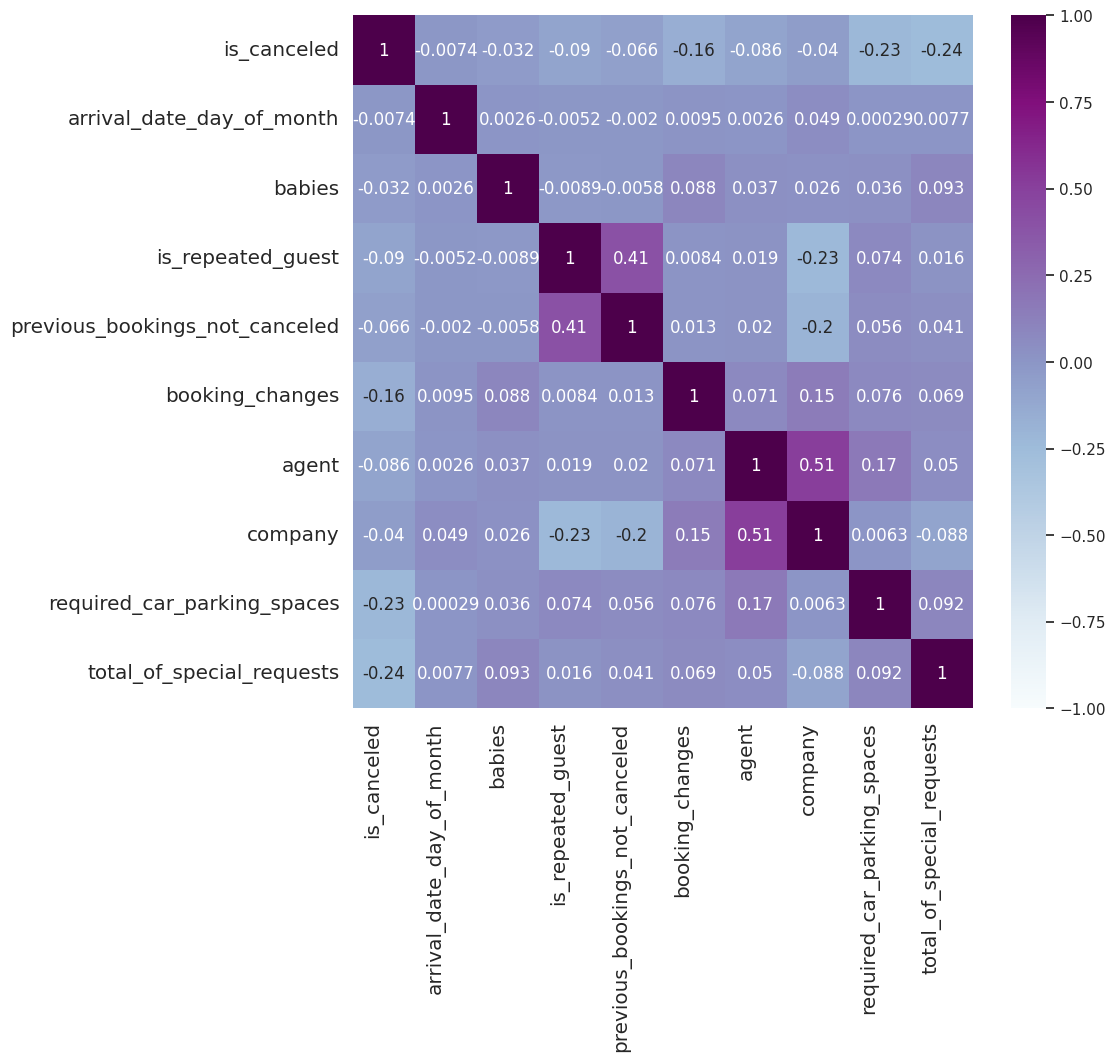

In [ ]:
lista_corr_negativas = ['is_canceled','arrival_date_day_of_month','babies','is_repeated_guest','previous_bookings_not_canceled','booking_changes','agent','company','required_car_parking_spaces','total_of_special_requests']
corr_matrix = df_hotels_train[lista_corr_negativas].corr() 
sns.set(rc = {'figure.figsize':(10,9)})
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="BuPu")
heatmap.set_xticklabels(
    
    heatmap.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)

heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontweight='light',
    fontsize='large'
)



plt.show()

Vemos que las variables que tiene la correlacion "negativa" mas alta son required_card_parking_space ,total_of_spaces_request y booking_changed. Luego tenemos otras que tienen una menor relacion con nuestra variable target como arrival_date_day_of_month (la cual es casi 0)

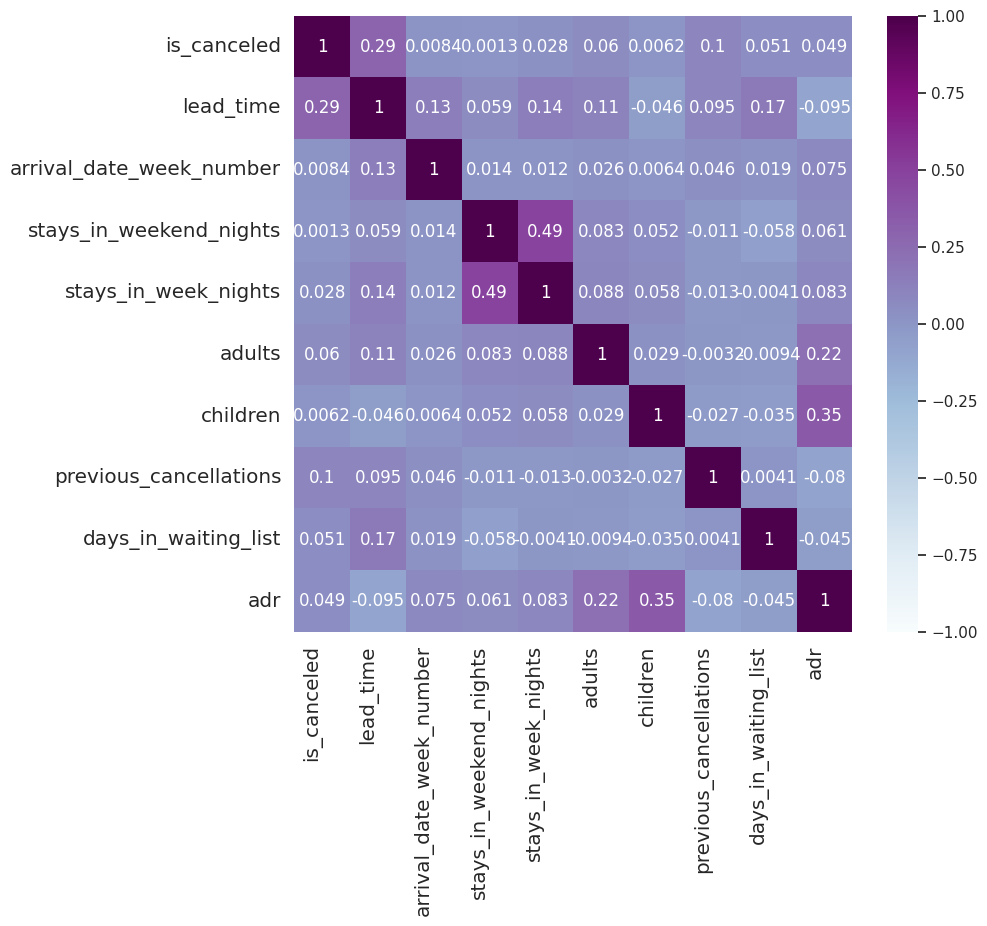

In [ ]:


lista_corr_positiva = ['is_canceled','lead_time','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights','adults','children','previous_cancellations','days_in_waiting_list','adr',]
corr_matrix = df_hotels_train[lista_corr_positiva].corr()
sns.set(rc = {'figure.figsize':(9,8)})
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="BuPu")
heatmap.set_xticklabels(
    
    heatmap.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)

heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontweight='light',
    fontsize='large'
)



plt.show()

Podemos ver que las variables que tienen una relacion "positiva" mas alta con nuestro target son lead_time y previos cancelation.
Luego, tenemos algunas variables que tambien tienen un correlacion considerable como adults (la cual, es bastante baja).
El resto de las variables tiene una correlacion muy baja con nuestra variable target

Como punto final, podemos tambien analizar la correlacion entre todas nuestras variables. ademas de nuestra variable target y ver si sus correlacion son fuertes o debiles

## Visualización de los datos

Como primera visualizacion de nuestros datos empezaremos por nuestra variable target (is_caceled)

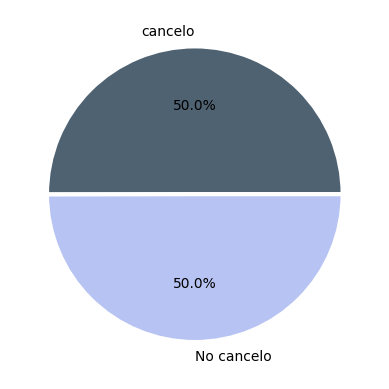

In [ ]:
cancelaciones = df_hotels_train['is_canceled'].value_counts()
colores = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
nombres = 'cancelo','No cancelo'
plt.pie(cancelaciones, labels = nombres, labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = colores, autopct = '%1.1f%%')
plt.show()

Como primer analisis vemos que tenemos un 50% de reservas canceladas y un 50% que no.

Como siguiente visualizacion, haremos un grafico para ver la dispersion de nuestros datos.

##Datos Faltantes

Analizar la presencia de datos faltantes en el dataset

In [ ]:
datos_faltantes = df_hotels_train.isnull().sum()
print(datos_faltantes)

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Obeservamos que en las columnas de: country, children, agent y company tenemos datos faltantes (por datos faltantes nos referimos a los datos que aparecen como NaN)

Realizamos los graficos correspondientes a dichos datos faltantes

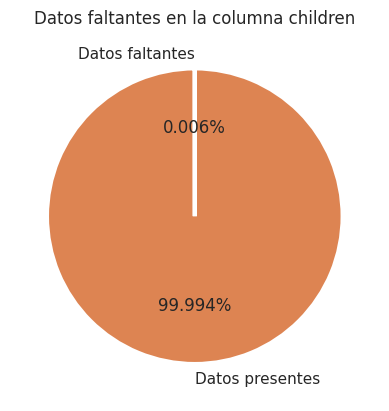

In [ ]:
datos_faltantes = df_hotels_train['children'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']
sizes = [datos_faltantes, len(df_hotels_train) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna children')

plt.show()




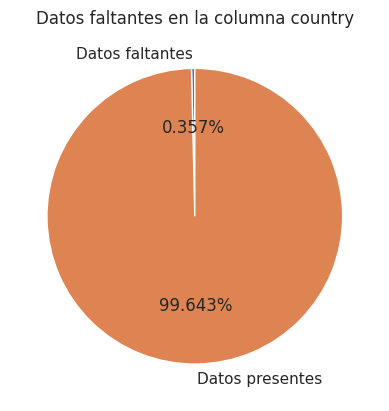

In [ ]:
datos_faltantes = df_hotels_train['country'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']
sizes = [datos_faltantes, len(df_hotels_train) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna country')

plt.show()

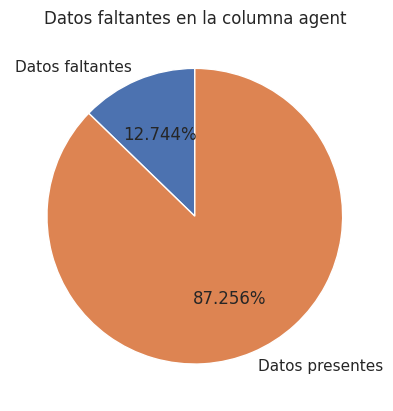

In [ ]:
datos_faltantes = df_hotels_train['agent'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']
sizes = [datos_faltantes, len(df_hotels_train) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna agent')

plt.show()

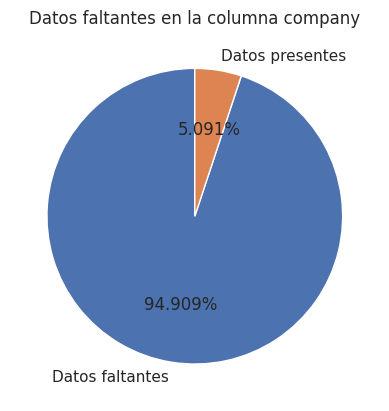

In [ ]:
datos_faltantes = df_hotels_train['company'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']
sizes = [datos_faltantes, len(df_hotels_train) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna company')

plt.show()

Decision sobre los datos faltantes 

La columna company tiene una cantidad de datos faltantes demasiado alto, por lo tanto tenemos poca informacion sobre dicha columna.
Por lo que procederemos a eliminar esta columna

In [31]:
#Eliminacion de company
df_hotels_train = df_hotels_train.drop(['company'], axis =1)

Las columnas children, agent y country tienen una cantidad mucho menor de datos faltantes (en el caso de agent la que tiene el porcentaje da datos faltantes mas alto) no nos parece bien eliminarlas, entonces vamos a tomar una moda y rellenarlas.
Tomaremos el valor que mas se repite como moda y lo usaremos para rellenas las ccolumnas de datos faltantes
Esta decision se debe a que conocemos bastante de dichas columnas, por lo tanto la decision mas acertada nos parece reemplazar los datos.

In [27]:
#Country
df_hotels_train['country'].fillna('PRT', inplace=True)

In [28]:
#Children
df_hotels_train['children'].fillna(0, inplace=True)

In [29]:
#Agent
df_hotels_train['agent'].fillna(9.0, inplace=True)

In [32]:
datos_despues_de_rellenarlos = df_hotels_train.isnull().sum()
print(datos_despues_de_rellenarlos)

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Vemos que despues de realizar las imputaciones de los datos (y la eliminacion de company) no tenemos datos faltantes en nuestro dataset

Graficos una vez realizada las imputaciones

<Axes: >

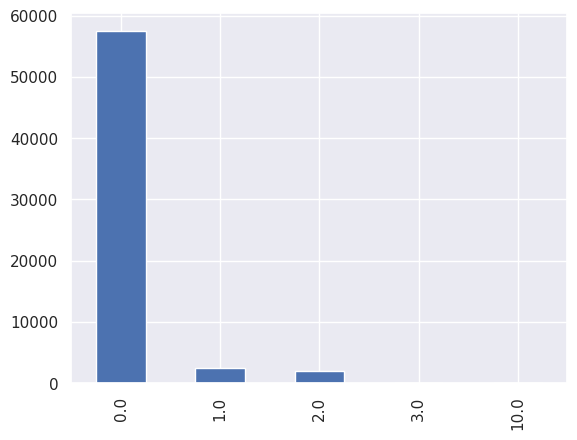

In [33]:
#Children
df_hotels_train['children'].value_counts().plot(kind='bar')

La variable children no tiene cambios en su grafico (debido a que tenemos un porcentaje bajisimo de datos faltantes)

<Axes: >

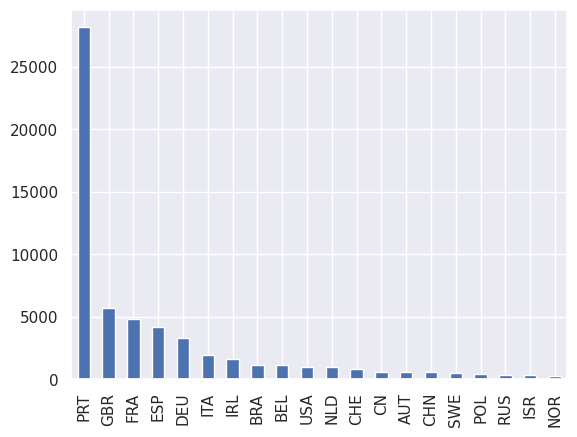

In [34]:
#Countrys
graf_de_paises = df_hotels_train['country'].value_counts().head(20)

graf_de_paises.plot(kind='bar')

Como vemos en el grafico, no notamos un incremento en paises, debido a que los datos faltantes tambien es muy bajo como para notar una alteracion en la distribucion de datos

<Axes: >

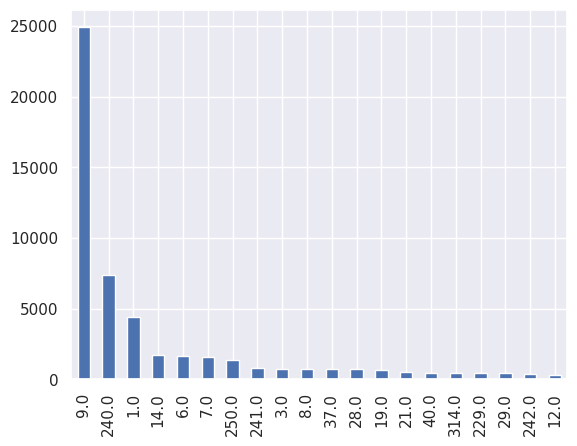

In [36]:
#Agent
graf_de_paises = df_hotels_train['agent'].value_counts().head(20)
graf_de_paises.plot(kind='bar')

Como vemos en en esa distribucion, si notamos un gran cambio de acuerdo a la original ya que el agent 9.0 pasa de tener 16 mil a casi 25 mil.
Era de esperarse, ya que rellenamos una gran parte del dataset, por lo tanto la distribucion tenia que subir.